<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Lab Series on Network Sciences   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 3: Nodes Classification with Vanilla Graph Neural Networks
This Jupyter Notebook is designed to help you grasp the most  different aspects of Nodes Classification with Vanilla Graph Neural Networks seen in the lecture.

## Install the required package

In [1]:
%pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


## Import the necessary libraries

In [2]:
# Import necessary libraries
from torch_geometric.datasets import Planetoid

## Download the Cora dataset using Planetoid

In [3]:
# Download the Cora dataset using Planetoid
dataset = Planetoid(root=".", name="Cora")

Processing...
Done!


## Access the dataset's data and print basic graph information

In [4]:
# Access the dataset's data
data = dataset[0]

# Print general information about the dataset
print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: Cora()
---------------
Number of graphs: 1
Number of nodes: 2708
Number of features: 1433
Number of classes: 7


## Check for additional properties of the graph

In [5]:
# Check various properties of the graph
print(f'Graph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


## Plotting The Graph using NetworkX
### Convert the PyTorch Geometric data to a NetworkX graph, Exporting to uniform graph format,  and  ploting

In [6]:
from torch_geometric.utils.convert import to_networkx
import networkx as nx

# Convert the PyTorch Geometric data to a NetworkX graph
graph = to_networkx(data, to_undirected=True)

# Export the NetworkX graph to a GraphML file
nx.write_graphml(graph, 'cora_graph.graphml')

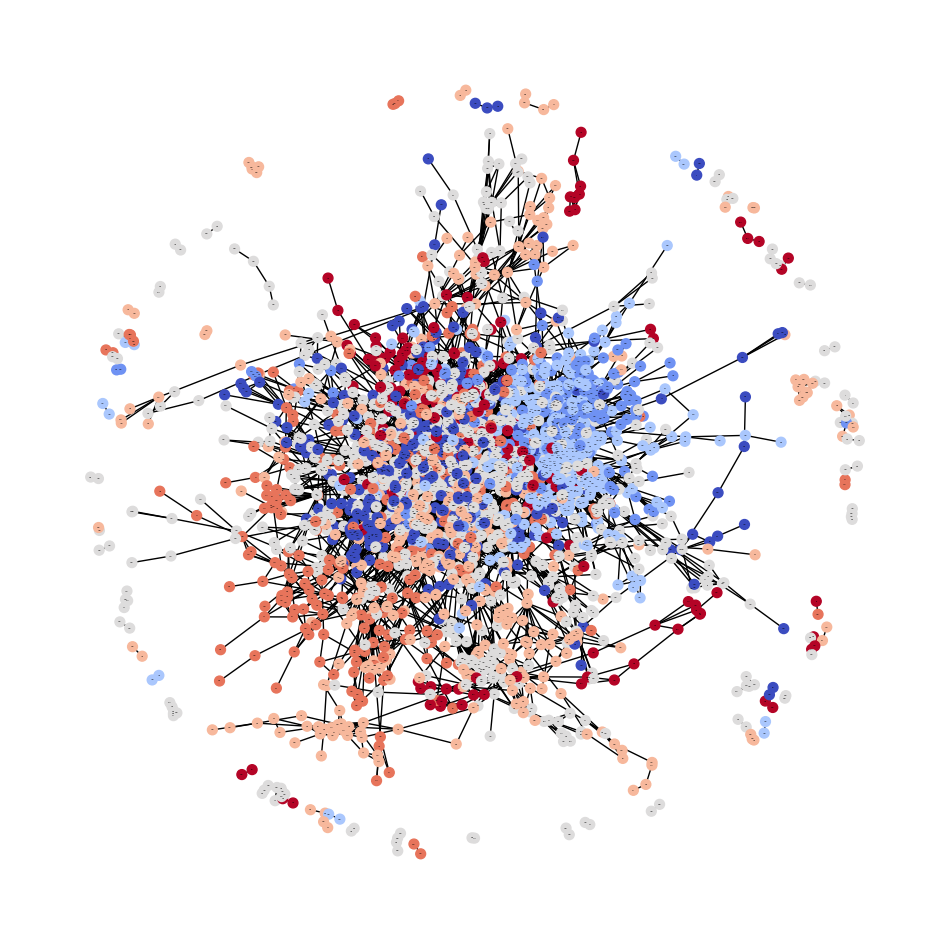

In [7]:
import matplotlib.pyplot as plt
# Define node colors based on labels (you can customize the color map)
node_colors = [data.y[i].item() for i in range(len(data.y))]

# Plot the graph
pos = nx.fruchterman_reingold_layout(graph)
plt.figure(figsize=(12, 12))
plt.axis('off')
nx.draw_networkx(graph, pos, node_color=node_colors, cmap=plt.get_cmap('coolwarm'), node_size=50, font_size=0)
plt.show()


## Node features as a regular tabular dataset

In [8]:
import pandas as pd
df_x = pd.DataFrame(data.x.numpy())
df_x['label'] = pd.DataFrame(data.y)

In [9]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


## Implementing MLP NN model
### MLP Class Implementation

In [10]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid

mlp_train_losses, mlp_val_losses =[], []
mlp_train_accs, mlp_val_accs =[], []
# Define the MLP class
class MLP(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)

    def accuracy(self, y_pred, y_true):
        # Calculate the accuracy of predictions
        return torch.sum(y_pred == y_true) / len(y_true)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()
        for epoch in range(epochs + 1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])



            acc = self.accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = self.accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
                # Append the values
                mlp_train_losses.append(loss.item())
                mlp_val_losses.append(val_loss.item())
                mlp_train_accs.append(acc.item())
                mlp_val_accs.append(val_acc.item())

        return self

    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = self.accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

### Create and Train  the MLP model

In [11]:
# Create  the MLP
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)


In [12]:
# train the MLP
mlp.fit(data, epochs=100)



Epoch   0 | Train Loss: 1.954 | Train Acc: 14.29% | Val Loss: 1.98 | Val Acc: 11.40%
Epoch  20 | Train Loss: 0.112 | Train Acc: 100.00% | Val Loss: 1.34 | Val Acc: 57.00%
Epoch  40 | Train Loss: 0.012 | Train Acc: 100.00% | Val Loss: 1.32 | Val Acc: 57.80%
Epoch  60 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 1.31 | Val Acc: 56.60%
Epoch  80 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.28 | Val Acc: 56.40%
Epoch 100 | Train Loss: 0.009 | Train Acc: 100.00% | Val Loss: 1.28 | Val Acc: 55.20%


MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)

### Test the MLP model and get accuracy

In [13]:
# Test the model and get accuracy
test_acc = mlp.test(data)
print(f'MLP test accuracy: {test_acc*100:.2f}%')

MLP test accuracy: 55.50%


### Visualize the Training and Validation Results

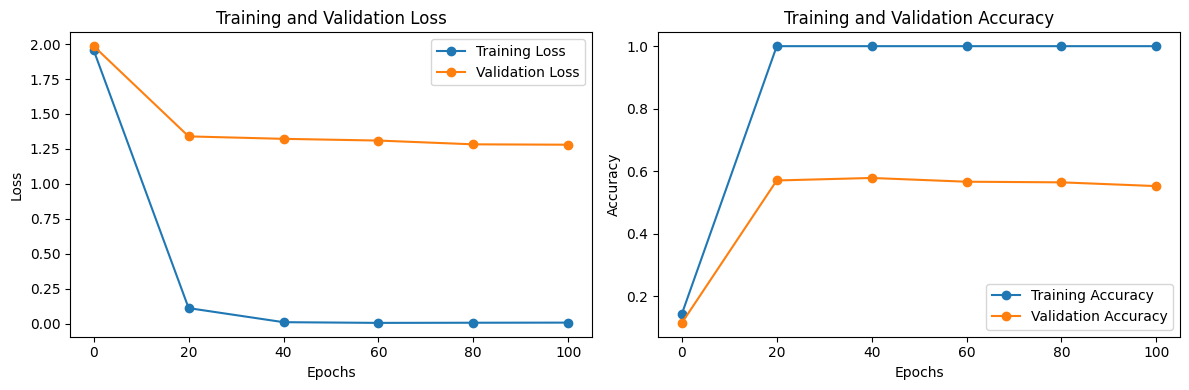

In [14]:
import matplotlib.pyplot as plt

# Assuming you have collected loss and accuracy values during training, let's say in lists 'mlp_train_losses', 'mlp_val_losses', 'mlp_train_accs', and 'mlp_val_accs'.

epochs = range(0, 101, 20)  # Assuming training every 20 epochs

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, mlp_train_losses, label='Training Loss', marker='o')
plt.plot(epochs, mlp_val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, mlp_train_accs, label='Training Accuracy', marker='o')
plt.plot(epochs, mlp_val_accs, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Implementing The Vanilla GNN Model
### Implementing the Vanilla GNN Layer Class

In [15]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.utils import to_dense_adj



class VanillaGNNLayer(nn.Module):
    def __init__(self, dim_in, dim_out):
        super(VanillaGNNLayer, self).__init__()
        # Initialize a linear transformation layer without bias
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        # Apply the linear transformation to the input node features
        x = self.linear(x)
        # Perform a sparse matrix-vector multiplication with the adjacency matrix
        x = torch.sparse.mm(adjacency, x)
        return x


### Declaring the train_losses, val_losses as well as train_accs and val_accs for visualization

In [16]:
gvnn_train_losses, gvnn_val_losses =[], []
gvnn_train_accs, gvnn_val_accs =[], []

### Implementing the Vanilla GNN model Class

In [28]:
class VanillaGNN(nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def accuracy(self, y_pred, y_true):
        # Calculate the accuracy of predictions
        return torch.sum(y_pred == y_true) / len(y_true)

    def fit(self, data, epochs, adjacency):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()
        for epoch in range(epochs + 1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = self.accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
                # Append the values
                gvnn_train_losses.append(loss.item())
                gvnn_val_losses.append(val_loss.item())
                gvnn_train_accs.append(acc.item())
                gvnn_val_accs.append(val_acc.item())

    def test(self, data, adjacency):
        self.eval()
        out = self(data.x, adjacency)
        return self.accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])

### Preparing the Adjacency Matrix used in message passing

In [29]:
adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.]])

### Create and Train the Vanilla GNN model

In [30]:
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=1433, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=7, bias=False)
  )
)


In [31]:
gnn.fit(data, epochs=100, adjacency=adjacency)

Epoch   0 | Train Loss: 1.990 | Train Acc:  1.80% | Val Loss: 1.92 | Val Acc: 16.00%
Epoch  20 | Train Loss: 0.023 | Train Acc:  1.80% | Val Loss: 1.91 | Val Acc: 75.20%
Epoch  40 | Train Loss: 0.003 | Train Acc:  1.80% | Val Loss: 2.25 | Val Acc: 75.20%
Epoch  60 | Train Loss: 0.001 | Train Acc:  1.80% | Val Loss: 2.36 | Val Acc: 76.80%
Epoch  80 | Train Loss: 0.001 | Train Acc:  1.80% | Val Loss: 2.32 | Val Acc: 76.60%
Epoch 100 | Train Loss: 0.001 | Train Acc:  1.80% | Val Loss: 2.26 | Val Acc: 76.60%


In [32]:
acc = gnn.test(data, adjacency=adjacency)
print(f'\nGNN test accuracy: {acc*100:.2f}%')


GNN test accuracy: 75.40%


### Visualize the Training and Validation Results

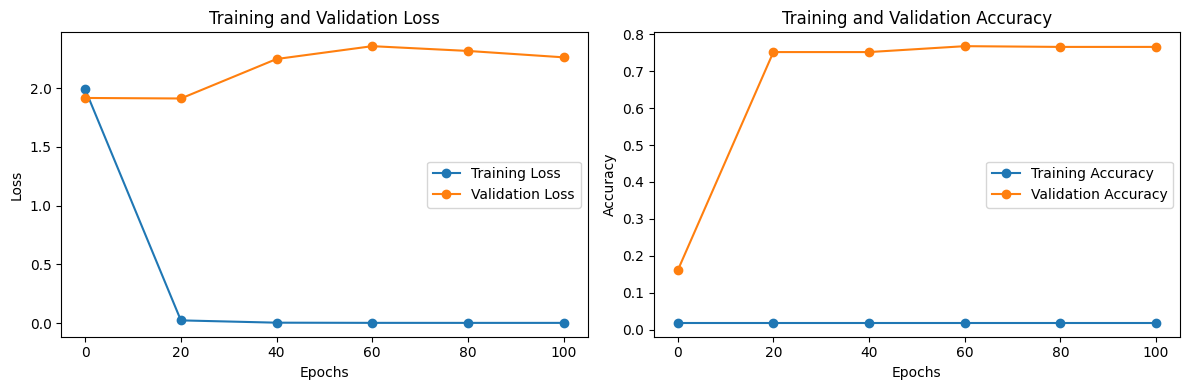

In [33]:
# Assuming you have collected loss and accuracy values during training, let's say in lists 'mlp_train_losses', 'mlp_val_losses', 'mlp_train_accs', and 'mlp_val_accs'.

epochs = range(0, 101, 20)  # Assuming training every 20 epochs

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, gvnn_train_losses, label='Training Loss', marker='o')
plt.plot(epochs, gvnn_val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, gvnn_train_accs, label='Training Accuracy', marker='o')
plt.plot(epochs, gvnn_val_accs, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Models Comparaison
| Dataset Name | MLP (Accuracy) | Vanilla GNN (Accuracy) | Boost (GNN - MLP) |
|--------------|----------------|------------------------|-------------------|
| Cora         | 55.50%         | 75.40%                 | +19.90%           |



## Challenge:

The Facebook Page-Page dataset This dataset was introduced by Rozemberczki et al. in 2019 [2]. In this dataset, each of the 22,470 nodes represents an official Facebook page.
Pages are connected when there are mutual likes between them. Node features (128-dim vectors) are created from textual descriptions written by the owners of these pages. Our goal is to classify each node into one of four categories: politicians, companies, television shows, and governmental organizations.

The Facebook Page-Page dataset is similar to the Cora dataset: it’s a social network with a node classification task. However, there are three major differences with Cora:
-  The number of nodes is much higher (2,708 versus 22,470)
-  The dimensionality of the node features decreased dramatically (from 1,433 to 128)
-  The goal is to classify each node into four categories instead of seven (which is easier since there are fewer options)

Following the previous steps in implementing the MLP and the Vanilla GNN models for the Cora dataset.
- Build 2 models: MLP and VanillaGNN for the Facebook Page-Page dataset
- Compare the two implemented models accuracy results and report how much boost is with the VanillaGNN model in comparaison to the MLP model.

`Hint:`

- Unlike Cora, Facebook Page-Page doesn’t have training, evaluation, and test masks by default. We can arbitrarily create masks with the range() function as follows:
```python
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)
```

- To import the FacebookPagePage Dataset you may use the following code:

```python
from torch_geometric.datasets import FacebookPagePage
```
- Then you can download it using this class:
```python
dataset_fsb = FacebookPagePage(root=".")
```

### **Libraries**

In [34]:
from torch_geometric.data import Data, InMemoryDataset, download_url
from torch_geometric.datasets import FacebookPagePage
from torch_geometric.utils.convert import to_networkx
from torch_geometric.utils import to_dense_adj
from torch_geometric.datasets import Planetoid
from sklearn.preprocessing import LabelEncoder
from typing import Callable, Optional
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.nn import Linear
import torch.nn as nn
import networkx as nx
import pandas as pd
import numpy as np
import torch

### **Load dataset**

In [35]:
features_file = "/kaggle/input/facebookpagepage/facebook_large/musae_facebook_features.json"
edges_file = "/kaggle/input/facebookpagepage/facebook_large/musae_facebook_edges.csv"
target_file = "/kaggle/input/facebookpagepage/facebook_large/musae_facebook_target.csv"

In [36]:
# Load features
features_df = pd.read_json(features_file, orient='index')  
x = torch.tensor(features_df.values, dtype=torch.float)

In [37]:
# Load target labels
target_df = pd.read_csv(target_file)  

labels = target_df['page_type']

# Convert string labels to integers (0,1,2,3)
le = LabelEncoder()
y = torch.tensor(le.fit_transform(labels), dtype=torch.long)

print("Classes:", le.classes_)    # ['company', 'government', 'politician', 'tvshow']
print("y shape:", y.shape)        # (22470,)
print("First 10 labels:", y[:10])

Classes: ['company' 'government' 'politician' 'tvshow']
y shape: torch.Size([22470])
First 10 labels: tensor([3, 1, 0, 1, 2, 2, 2, 2, 1, 1])


In [38]:
# Load edges
edges_df = pd.read_csv(edges_file)
# PyG expects edge_index as [2, num_edges]
edge_index = torch.tensor(edges_df.values.T, dtype=torch.long)

In [39]:
num_nodes = x.size(0)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

In [40]:
data = Data(x=x, edge_index=edge_index, y=y)
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

print(data)

Data(x=[22470, 31], edge_index=[2, 171002], y=[22470], train_mask=[22470], val_mask=[22470], test_mask=[22470])


In [41]:
data.train_mask = torch.arange(0, 18000)
data.val_mask = torch.arange(18000, 20000)
data.test_mask = torch.arange(20000, data.num_nodes)

In [42]:
print(f'Dataset: {data}')
print('---------------')
print(f'Number of graphs: {len(data)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {data.num_features}')

Dataset: Data(x=[22470, 31], edge_index=[2, 171002], y=[22470], train_mask=[18000], val_mask=[2000], test_mask=[2470])
---------------
Number of graphs: 6
Number of nodes: 22470
Number of features: 31


In [43]:
print(f'Graph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Graph:
------
Edges are directed: True
Graph has isolated nodes: False
Graph has loops: True


In [44]:
data.x = torch.tensor(data.x, dtype=torch.float)
data.x[torch.isnan(data.x)] = 0

/tmp/ipykernel_48/4125333195.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data.x = torch.tensor(data.x, dtype=torch.float)


### **MLP**

In [45]:
print(data.x.shape)           # (22470, 31)
print(data.x[:5])             # look at first few rows
print(data.x.min(), data.x.max())  # min and max values


torch.Size([22470, 31])
tensor([[2835., 4518., 2198., 2014., 3818., 3045., 4570., 4585., 4596., 4599.,
         4609., 4617., 4627., 4641., 4643., 4651., 4665., 4676., 4682., 4694.,
         4696., 4708.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [3293., 2534.,  979., 2014., 2317.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [4477., 2895., 4039., 3282.,  765., 2669.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [3133., 2052.,  979., 3355.,  107., 1878., 1105., 4571., 4582., 4593.,
         4598., 4609., 4619., 4629., 4636., 4642., 4652., 4662., 4675., 4683.,
         4689., 4704., 4713.,    0.,    0.,    0.,    0.

In [46]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid

mlp_train_losses, mlp_val_losses =[], []
mlp_train_accs, mlp_val_accs =[], []
# Define the MLP class
class MLP(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return x

    def accuracy(self, y_pred, y_true):
        # Calculate the accuracy of predictions
        return torch.sum(y_pred == y_true) / len(y_true)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001, weight_decay=5e-4)

        self.train()
        for epoch in range(epochs + 1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])



            acc = self.accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = self.accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
                # Append the values
                mlp_train_losses.append(loss.item())
                mlp_val_losses.append(val_loss.item())
                mlp_train_accs.append(acc.item())
                mlp_val_accs.append(val_acc.item())

        return self

    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = self.accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [47]:
mlp = MLP(dim_in=data.x.shape[1], dim_h=64, dim_out=4) 
print(mlp)

MLP(
  (linear1): Linear(in_features=31, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=4, bias=True)
)


In [48]:
mlp.fit(data, epochs=100)

Epoch   0 | Train Loss: 510.954 | Train Acc: 24.23% | Val Loss: 501.92 | Val Acc: 24.55%
Epoch  20 | Train Loss: 131.822 | Train Acc: 24.96% | Val Loss: 129.67 | Val Acc: 24.50%
Epoch  40 | Train Loss: 69.670 | Train Acc: 26.04% | Val Loss: 69.48 | Val Acc: 26.85%
Epoch  60 | Train Loss: 43.072 | Train Acc: 26.45% | Val Loss: 44.06 | Val Acc: 25.75%
Epoch  80 | Train Loss: 31.059 | Train Acc: 26.83% | Val Loss: 31.91 | Val Acc: 27.00%
Epoch 100 | Train Loss: 23.251 | Train Acc: 26.93% | Val Loss: 23.99 | Val Acc: 26.60%


MLP(
  (linear1): Linear(in_features=31, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=4, bias=True)
)

In [49]:
test_acc = mlp.test(data)
print(f'MLP test accuracy: {test_acc*100:.2f}%')

MLP test accuracy: 27.98%


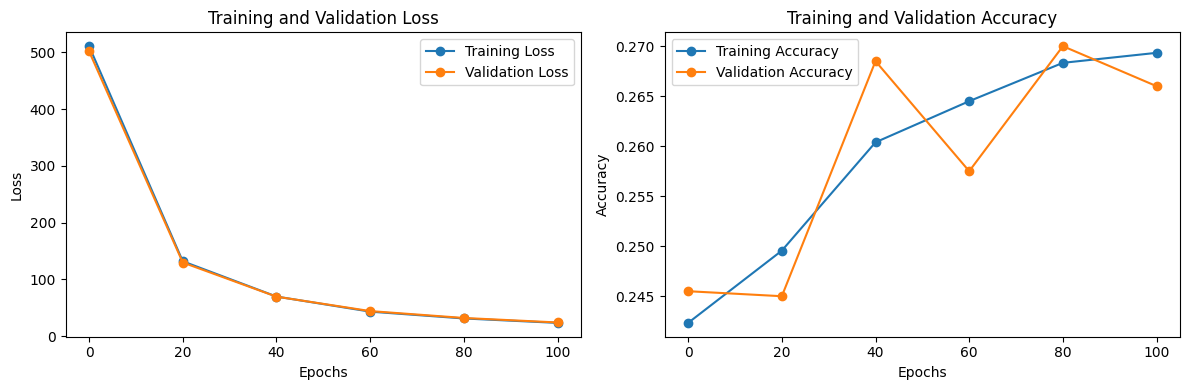

In [50]:
epochs = range(0, 101, 20) 

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, mlp_train_losses, label='Training Loss', marker='o')
plt.plot(epochs, mlp_val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mlp_train_accs, label='Training Accuracy', marker='o')
plt.plot(epochs, mlp_val_accs, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### **Vanilla GNN**

In [51]:
class VanillaGNNLayer(nn.Module):
    def __init__(self, dim_in, dim_out):
        super(VanillaGNNLayer, self).__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        x = self.linear(x)
        x = torch.sparse.mm(adjacency, x)
        return x

In [52]:
gvnn_train_losses, gvnn_val_losses =[], []
gvnn_train_accs, gvnn_val_accs =[], []

In [53]:
class VanillaGNN(nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def accuracy(self, y_pred, y_true):
        return torch.sum(y_pred == y_true) / len(y_true)

    def fit(self, data, epochs, adjacency):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()
        for epoch in range(epochs + 1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = self.accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
                gvnn_train_losses.append(loss.item())
                gvnn_val_losses.append(val_loss.item())
                gvnn_train_accs.append(acc.item())
                gvnn_val_accs.append(val_acc.item())

    def test(self, data, adjacency):
        self.eval()
        out = self(data.x, adjacency)
        return self.accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])

In [54]:
adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [55]:
gnn = VanillaGNN(data.x.shape[1], 64, 4) 
print(gnn)

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=31, out_features=64, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=64, out_features=4, bias=False)
  )
)


In [56]:
gnn.fit(data, epochs=100, adjacency=adjacency)

Epoch   0 | Train Loss: 116082.445 | Train Acc: 75.40% | Val Loss: 15647.87 | Val Acc: 15.80%
Epoch  20 | Train Loss: 14436.483 | Train Acc: 75.40% | Val Loss: 2618.39 | Val Acc: 33.80%
Epoch  40 | Train Loss: 4571.380 | Train Acc: 75.40% | Val Loss: 973.16 | Val Acc: 35.10%
Epoch  60 | Train Loss: 1180.917 | Train Acc: 75.40% | Val Loss: 405.13 | Val Acc: 29.95%
Epoch  80 | Train Loss: 353.378 | Train Acc: 75.40% | Val Loss: 189.76 | Val Acc: 28.05%
Epoch 100 | Train Loss: 123.370 | Train Acc: 75.40% | Val Loss: 88.96 | Val Acc: 28.40%


In [57]:
acc = gnn.test(data, adjacency=adjacency)
print(f'\nGNN test accuracy: {acc*100:.2f}%')


GNN test accuracy: 27.85%


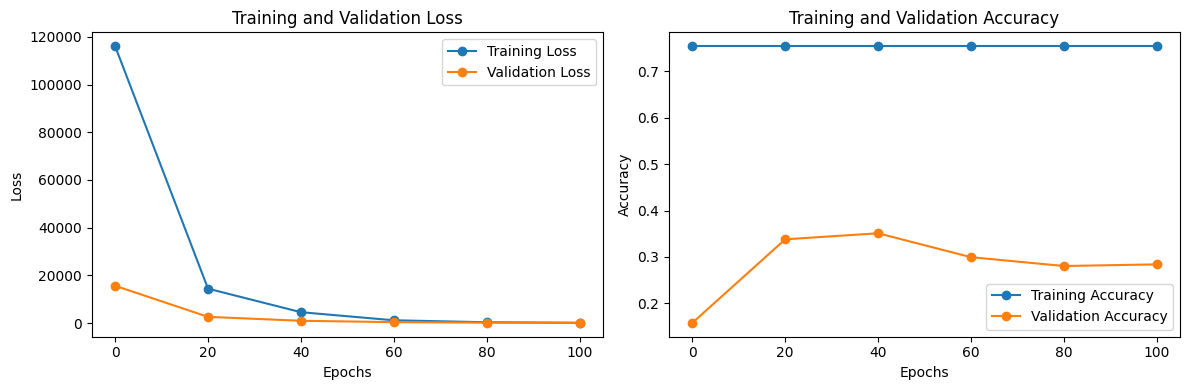

In [59]:
epochs = range(0, 101, 20)  

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, gvnn_train_losses, label='Training Loss', marker='o')
plt.plot(epochs, gvnn_val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, gvnn_train_accs, label='Training Accuracy', marker='o')
plt.plot(epochs, gvnn_val_accs, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()